#### Copie de Mehdi - ne pas enregistrer dessus (génération de conflits)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
from glob import glob
import pickle

import numpy as np
import pandas as pd

import nltk
import re
import codecs
import unidecode
#pip install unidecode
import mpld3
# pip install mpld3
import stop_words
# pip install stop-words
from nltk import SnowballStemmer, pos_tag, word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords

from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import HashingVectorizer,TfidfTransformer,TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import Normalizer
from sklearn.metrics.pairwise import *
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.semi_supervised import *

import matplotlib.pyplot as plt
%matplotlib inline

## Lecture des données 

Objectif garder uniquement les parties contenant les compétences

#### Suppression des sauts de ligne

In [2]:
import string, re

In [3]:
def del_line_feed(s):  
    """Delete \n in the text"""
    regex = re.compile('[%s]' % '(\\n)*(\\x0c)*(\\uf0a7)*')
    return regex.sub(' ', s)

#### Suppression ponctuation

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def del_punct(s):  
    """Delete punctuation in the text"""
    #le maintient de la ponctuation pertube le stop words, apostrophe gérée dans text_treatment
    regex = re.compile('[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_{|}~')) 
    return regex.sub(' ', s)

In [6]:
class CV:
    def __init__(self, filename, title, cv, doc_type):
        self.filename = filename
        self.title = title
        self.cv = cv
        self.doc_type = doc_type

In [7]:
def cv_keep_comp(cv):
    if "compétences & outils" in cv:
        cv_split1 = cv.split("compétences & outils")[1]
        if "formations & certifications" in cv_split1:
            cv_light = cv_split1.split("formations & certifications")[0]
        else:
            cv_light = ""
            
    elif "compétences" in cv:
        cv_split1 = cv.split("compétences")[1]
        if "experience professionnelle" in cv_split1:
            cv_light = cv_split1.split("experience professionnelle")[0]
        elif "expérience professionnelle" in cv_split1:
            cv_light = cv_split1.split("expérience professionnelle")[0]
        elif "parcours professionnel" in cv_split1:
            cv_light = cv_split1.split("parcours professionnel")[0]
        elif "langues" in cv_split1:
            cv_light = cv_split1.split("langues")[0]
        elif "experience" in cv_split1:
            cv_light = cv_split1.split("experience")[0]
        elif "expérience" in cv_split1:
            cv_light = cv_split1.split("expérience")[0]
        else:
            cv_light = ""
            
    elif "competences" in cv:
        cv_split1 = cv.split("competences")[1]
        if "experience" in cv_split1:
            cv_light = cv_split1.split("experience")[0]
        elif "expérience" in cv_split1:
            cv_light = cv_split1.split("expérience")[0]
        elif "parcours professionnel" in cv_split1:
            cv_light = cv_split1.split("parcours professionnel")[0]
        elif "formations & certifications" in cv_split1:
            cv_light = cv_split1.split("formations & certifications")[0]
        elif "formation" in cv_split1:
            cv_light = cv_split1.split("formations & certifications")[0]
        elif "langues" in cv_split1:
            cv_light = cv_split1.split("langues")[0]
        else:
            cv_light = ""
    
    elif "it skills" in cv:
        cv_split1 = cv.split("it skills")[1]
        if "activities & interests" in cv_split1:
            cv_light = cv_split1.split("activities & interests")[0]
        elif "hobbies" in cv_split1:
            cv_light = cv_split1.split("hobbies")[0]
        else:
            cv_light = ""
    
    else:
        cv_light = ""
    
    return cv_light   

In [8]:
#download cv in a list
def load_Doc_list(nombre, path, doc_type):
    liste_paths = [path+directory for directory in os.listdir(path)]
    #print(liste_paths)
    liste_cv = []
    dico_cv = {}
    for path in liste_paths :
        cv = CV(0, 0, 0, 0)
        cv.filename = os.path.basename(path)
        
        try:
            cv.cv = open(path).read()
            cv.cv = cv_keep_comp(del_punct(del_line_feed(cv.cv.lower())))
                
            cv.doc_type = doc_type
            liste_cv.append(cv.cv)
            dico_cv[cv.filename.split(".")[0]] = cv
        except UnicodeDecodeError:
            print("Error !")
            print(path)
    return liste_cv, dico_cv

In [9]:
print("Loading titles")
def load_title_list(nombre, path):
    path = "../Maha/data/"
    dico_titles = {}
    filenames = sorted(glob(os.path.join(path,"*.csv")))
    for file in filenames[:nombre]:
        with open(file, encoding='latin-1') as csvfile:
            readCSV = csv.reader(csvfile, delimiter=';')
            for row in readCSV:
                dico_titles[row[0]] = row[1]
    return dico_titles

Loading titles


In [10]:
path_CV = '../Commun/Data_Talan/txt/'

#### load cv

In [11]:
liste_cv, dico_cv = load_Doc_list(200, path_CV, 'cv')

In [12]:
for i,cv in enumerate(liste_cv):
    print("idx_{}__nb mots:{}".format(i,len(cv.split())))

idx_0__nb mots:34
idx_1__nb mots:0
idx_2__nb mots:70
idx_3__nb mots:57
idx_4__nb mots:0
idx_5__nb mots:0
idx_6__nb mots:84
idx_7__nb mots:171
idx_8__nb mots:28
idx_9__nb mots:0
idx_10__nb mots:0
idx_11__nb mots:0
idx_12__nb mots:57
idx_13__nb mots:0
idx_14__nb mots:136
idx_15__nb mots:0
idx_16__nb mots:0
idx_17__nb mots:0
idx_18__nb mots:62
idx_19__nb mots:86
idx_20__nb mots:0
idx_21__nb mots:178
idx_22__nb mots:0
idx_23__nb mots:56
idx_24__nb mots:0
idx_25__nb mots:11
idx_26__nb mots:0
idx_27__nb mots:113
idx_28__nb mots:100
idx_29__nb mots:67
idx_30__nb mots:77
idx_31__nb mots:0
idx_32__nb mots:0
idx_33__nb mots:0
idx_34__nb mots:341
idx_35__nb mots:107
idx_36__nb mots:0
idx_37__nb mots:0
idx_38__nb mots:0
idx_39__nb mots:118
idx_40__nb mots:0
idx_41__nb mots:25
idx_42__nb mots:0
idx_43__nb mots:0
idx_44__nb mots:101
idx_45__nb mots:0
idx_46__nb mots:407
idx_47__nb mots:0
idx_48__nb mots:0
idx_49__nb mots:89
idx_50__nb mots:125
idx_51__nb mots:0
idx_52__nb mots:0
idx_53__nb mots:391


In [13]:
liste_cv[7]

'   outils méthodes planification et gestion de l’ensemble des phases du cycle en v   analyse des besoins métier  conception  rédaction de spécifications  réalisation  qualification  rédaction de la documentation  mise en production et phase de garantie  responsable de tma   suivi opérationnel  échéancier de facturation  tracé et suivi des indicateurs contractuels et enveloppes budgétaires  préparation et animation de comités projet et pilotage outils cadrage et rédaction de spécifications fonctionnelles conception et architecture logicielle maquettage d’application conception et architecture de base de données stratégie de qualification  réalisation de tests automatisés expertise technique garantir la cohérence fonctionnelle et technique de la solution spécifique recherche de solutions et rédaction de spécifications logicielles développement logiciel sur plateforme microsoft mise en place de référentiels de données base de données   sql server  oracle 11g langages de programmation   t

Necessité de revoir la séparation -> trop de vocabulaire pour les CVs -> il faut absolument le réduire pour pouvoir faire de l'association rule mining...

Hypothèse on ne garde que les x premiers mots des CVs de la partie dédiée aux compétences, si on est au delà c'est que le cv n'a pas été bien découpé au préalable (partie compétence)

In [14]:
liste_cv_light = []
for i,cv in enumerate(liste_cv):
    if len(cv.split())>10:
        if len(cv.split())>40:
            liste_cv_light.append(" ".join(cv.split()[:40]))
        else:
            liste_cv_light.append(cv)

In [15]:
len(liste_cv_light)

312

** Reconnaissance du langage du CV**

In [16]:
def _calculate_languages_ratios(text):
    """
    Calculate probability of given text to be written in several languages and
    return a dictionary that looks like {'french': 2, 'spanish': 4, 'english': 0}
    """

    languages_ratios = {}

    '''
    nltk.wordpunct_tokenize() splits all punctuations into separate tokens
    
    >>> wordpunct_tokenize("That's thirty minutes away. I'll be there in ten.")
    ['That', "'", 's', 'thirty', 'minutes', 'away', '.', 'I', "'", 'll', 'be', 'there', 'in', 'ten', '.']
    '''

    tokens = wordpunct_tokenize(text)
    words = [word.lower() for word in tokens] #from text get list of word in minuscule

    
    for language in stopwords.fileids(): # pour chaque langue
        stopwords_set = set(stopwords.words(language)) #je mets les stop words du langage dans un set
        words_set = set(words) #je mets les mots de mon texte dans un set
        #je prends l'intersection entre les mots de mon texte et les mots du stopwords dans le langage donné
        common_elements = words_set & stopwords_set
        
        #je compute mon score comme le nombre d'éléments en communs dictionnaire [langage : score]
        languages_ratios[language] = len(common_elements) # language "score"

    return languages_ratios

In [17]:
import nltk
nltk.download('stopwords')
stopwords.fileids()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehdiregina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

In [18]:
def get_cv_langue(liste_cv) :
    """Return resume witten in the specified language in parameter"""
    liste_2 = []
    for cv in liste_cv:
        if max(_calculate_languages_ratios(cv),key =_calculate_languages_ratios(cv).get)=='french':
            liste_2.append(cv)
    return liste_2

In [19]:
liste_cv_fr = get_cv_langue(liste_cv_light)

** Preprocessing du text **

In [20]:
def text_treatment (text):
    text = text.lower()
    text = text.replace("\x00", '').replace("\x01", '').replace("\x02", '').replace("\x03", '') \
    .replace("\x04", '').replace("\x05", '').replace("\x06", '').replace("\x07", '').replace("\x08", '') \
    .replace("\x0e", '').replace("\x11", '').replace("\x12", '').replace("\x10", '').replace("\x19", '') \
    .replace("\x1b", '').replace("\x14", '').replace("\x15", '').replace('/', '').replace('=', '').replace("〓", "") \
    .replace("»", "").replace("«", "").replace("¬", "").replace('`', '').replace (" -", "").replace("•", "")\
    .replace("l'", "").replace("l’", "").replace("l´", "").replace("d’", "").replace("d'", "").replace("d´","")\
    .replace("j’", "").replace("j'", "").replace("j´","").replace("n’", "").replace("n'", "").replace("n´","")\
    .replace("”", "").replace("~", "").replace("§", "").replace("¨", "").replace("©", "").replace("›", "")\
    .replace("₋", "").replace("→", "").replace("⇨", "").replace("∎", "").replace("√", "").replace("□", "")\
    .replace("*", "").replace("&", "").replace("►", "").replace("◊", "").replace("☞", "").replace("#", "")\
    .replace("%", "").replace("❖", "").replace("➠", "").replace("➢", "").replace("", "").replace("✓", "") \
    .replace("√", "").replace("✔", "").replace("♦", "").replace("◦", "").replace("●", "").replace("▫", "")\
    .replace("▪", "").replace("…", "").replace("þ", "").replace("®", "").replace('', '').replace("...", "")\
    .replace(" o ", "")
    text = unidecode.unidecode(text) # remove accent
    return text

** Gestion des stop words **

In [36]:
#generate stopwords
stop_words_py = set(stop_words.get_stop_words('french'))

# attention certains stop words pourraient être utiles par la suite
stopwords_set_manuel = set(["an", "ans", 'les', 'moins', 'd\'un','janvier', 'fevrier', 'février', 'mars', 'avril', \
                 'mai', 'juin', 'juillet', 'aout', 'août', 'septembre', 'octobre', 'novembre', 'décembre', \
                  'decembre', 'moins', 'mise', 'universit\xc3\xa9', 'université', 'universite', 'ion','sage', \
                  'o', 'rac', 'vers', 'via', 'p\xc3\xa9rim\xc3\xa8tre', 'périmètre','et','paris','x',"\x00",\
                          "\x01","\x02", "\x03","\x04","\x05","\x06","\x07","\x08","\x09","\x0e","\x0e","\x11",\
                           "\x12","\x13","\x14","\x15","\x16","\x17","\x18","\x19","transport","puis","lieu",\
                           "adresse","entre",'dun','dune','chez','boulognebillancourt','bt','etc','recrutement','main',\
                           'and', 'paie','paiement','environ','place','france','paris','mois','mobile','mobiles',\
                           'nanterre','source','sources','concerne','concernant','of','non','notes','rh','minimum',\
                           'maximum','bac','site','sites','actuellement','telephone','telephonique','telephoniques','ca','demenager',\
                           'demenagement','participer','participation','lycee','baccalaureat','lien','liens','in',\
                           'indeed','email','indeedcomrd7e8913ed00d0384','aujourhui','afin','toujours','enterprise',\
                           "guide","10g","11g","9i",'ad','v10','v2','v3','v5','v6','v8','v9','pablo','neruda',\
                           'dec','stelsia','cid1','sens','va','24h24', '7j7', 'levalloisperret','louis', 'armand', 'ermont',\
                            'localisation','anne', 'perot',' s ','mission', 'date', 'debut','fin','avenue', 'val', 'oise',\
                           'echeant','bout','division','prestations', 'intellectuelles', 'contexte','descroix','24h', '7j',\
                           'disposition','places','moyens', 'sncf', 'mis','rue','levallois','perret','scnf','ainsi',\
                           "jusqu'au","jusqu'a",'ast','exercant','souhaitee','competences',\
                           "ensemble","phases","phase","technique","garantir","coherence","referentiels","server","langages","langage"\
                           "secteurs",'activite','metier','campaign',"sup'com",'collegiate','contest','deuxieme',\
                            'competition','outil','arts','metiers','methodes','methode','trace',\
                           'entity','services','centres','interet','musculation','cuisine','voyage','travail','groupe','realisation',\
                            'team','building','presentation','devant','publique','versions','anterieurs','etats',\
                            'crystal','reports','superviseur','tiers','secteurs','marche','tertiaire','specialite',\
                           'divers','lumiere','lyon','parcours','sise','iup','institut','universitaire','professionnel',\
                           '1ere','annee','3eme','annee','licence','dut','niort','techniques','langues','vivantes','anglais',\
                            'professionnel','espagnol','scolaire','arabe','parle','revue','code','check','list','2008r2',\
                           'biginsight','general','prog','procedurale','parallele','qt','compilation','courant','jour',\
                           'informatiques','suites','active','activites','adaptation','alternance','animation','annees',\
                           'appliquees','autour','aupres','autres','avance','avancees','bien','campus','cartographie','cas',\
                           'center','centrale','centre','certification','certifications','charges','choix','classe','client',\
                            'clients','com','comite','comites','cours','derive','detail','differents','diplomes',\
                           'e','ecrit','ecriture','effets','engagee','enjeux','enquete','entite','entreprise',\
                           'esprit','etant','etoile','europe','evenements','externes','famille','fixes','fortes','fr',\
                           'garantie','generale','grandes','group','hp','humaines','impact','import','investissement',\
                           'langage','lille','livraison','locaux','mises','missions','mode','national','nationale','necessaires',\
                            'niveau','passage','plusieurs','periode','permettra','pertinence','principaux','principes','promotion',\
                            'proposes','rapidement','rencontres','reprise','saint','salle','secteur','sein','selon',\
                           'suite','suivant','tant','tendances','toutes','travaux','tres','type',\
                            'utilisateur','utilisateurs','utilisation','utilises','voix','voyages',
                           'monde','naive','serieux','cozyroc','pitney','transilvania','les','product','washington','aa','master2',\
                            'permis','postgraduate','aptitudes','skype','mailchimp','tel','supplementaires','organisee','positions',\
                            'bretagne','jargon','contextes','vitre','revenue','maitrise-','documentaire','etude','i','nov','augmentation',\
                            'mega','economique','certified','langage','maroc','explicatifs','best','poc','courantes', 'santander',\
                            'parametrique','genie','programme','nn','essec','urbanisme','elaboration','prelude','clientele',\
                            'servicecenter','librairies','correct','survie','-javascript','titres','meeting','japonais','cv',\
                            'superieure','operationnelle','rip','bresilienne','1mois','allemand','enrichis','variables','agences',\
                            'casablanca','lan','forte','pro','cadre','matrice','serveur','carrieres','juniors','comptes',\
                            'union','ateliers','vuitton','essym','profit','ressources','retour','generales','total','cergy',\
                            'vouloir','saurai', 'vapocraqueur','macro','asnieres','enquetes','ide','cations','recepteurs',\
                            'ordonnancement','critique','telediffusion','action','vehicule','pl','sectorielles','informatique',\
                           'materiel','ms','information','pack','outils','ingenieur','experience','methodologie','master',\
                           'notions','techniques','changement','technologies'])



stop_words_main = stop_words_py | stopwords_set_manuel
stop_words_main = list(stop_words_main)
print("taille stop words liste : ", len(stop_words_main))

taille stop words liste :  725


In [37]:
stop_words_main

['suites',
 '24h',
 'telephoniques',
 'vois',
 'aurait',
 'voix',
 'moins',
 'promotion',
 'fais',
 'lumiere',
 'aurons',
 'etude',
 'clientele',
 'parametrique',
 'eue',
 'augmentation',
 'livraison',
 'titres',
 'enquete',
 'dehors',
 'auras',
 'elles',
 'fût',
 'disposition',
 'telephonique',
 'organisee',
 'team',
 'carrieres',
 'demenager',
 'evenements',
 'université',
 'novembre',
 'as',
 'telephone',
 'prestations',
 'ensemble',
 'nationale',
 'serons',
 'environ',
 'pÃ©rimÃ¨tre',
 'font',
 'dedans',
 'sommes',
 'cadre',
 'urbanisme',
 'universite',
 'changement',
 'mobile',
 'fussent',
 'ma',
 'par',
 'ton',
 'selon',
 'and',
 'metier',
 'deuxieme',
 'investissement',
 'certifications',
 'place',
 'leurs',
 'devoir',
 'langage',
 'quel',
 'rencontres',
 '9i',
 'v9',
 'aurais',
 'parle',
 'entite',
 'aies',
 'leur',
 'contexte',
 'com',
 'sa',
 'auront',
 'proposes',
 '\x06',
 'divers',
 'armand',
 'tellement',
 'sera',
 'périmètre',
 'levallois',
 'ceux',
 'v10',
 'mars',
 'ex

In [38]:
#voir si utile
def remove_stopwords(text,stopwords_list):
    text_temp = " ".join(text.split())+" "
    for word in stopwords_list:
        text_temp = text_temp.replace(" "+word+" ", " ")
    return text_temp

In [39]:
liste_cv = [remove_stopwords(text_treatment(cv),stop_words_main) for cv in liste_cv_light]

In [40]:
#SnowballStemmer 
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("french")

In [41]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters 
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters 
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [42]:
liste_cv_tokenized = [tokenize_only(cv) for cv in liste_cv]
liste_cv_tokenized

[['savoir',
  'gestion',
  'relation',
  'conseil',
  'gestion',
  'portefeuille',
  'professionnels',
  'planification',
  'gestion',
  'projets',
  'marketing',
  'logiciels',
  'gestion',
  'erp',
  'crm',
  'bureautique',
  'office',
  'word',
  'excel',
  'access',
  'powerpoint'],
 ['debutant',
  'expert',
  'java',
  'vba',
  'matlab',
  'indesign',
  'php',
  'mysql',
  'html',
  'css',
  'script',
  'shell',
  'c',
  'python',
  'francais',
  'langue',
  'maternelle',
  'toeic',
  'formations',
  'cycle',
  'specialise',
  'reseaux',
  'imt',
  'atlantique',
  'telecom',
  'plouzane'],
 ['sectorielles',
  'energie',
  'telecoms',
  'industrie',
  'serveurs',
  'applications',
  'progiciels',
  'apache',
  'methodologies',
  'uml',
  'merise',
  'xml',
  'developpement',
  'sql',
  'visual',
  'basic',
  'c',
  'c',
  'c',
  'php',
  'perl',
  'pascal',
  'systemes',
  'exploitation',
  'windows',
  'bases',
  'donnees',
  'relationnelles',
  'oracle',
  'mysql',
  'access',
  

In [43]:
#let's build cv vocab set
flat_list = []
for token_list in liste_cv_tokenized:
    flat_list += token_list
set_vocab_cv = set(flat_list)
print("taille du vocab_cv : {}".format(len(set_vocab_cv)))

taille du vocab_cv : 1876


In [44]:
set_vocab_cv

{'adl',
 'based',
 'microstrategy',
 'confirme',
 'free',
 'ftth',
 'catia',
 'resolution',
 '5meur',
 'soap',
 'bo4',
 'spring',
 'esb',
 'effectif',
 'aspect',
 'jpa',
 'modele',
 'mbf',
 'enveloppes',
 'manager',
 'organisation',
 'one',
 'engagement',
 'proii',
 'professionnelles',
 'dids',
 'comptable',
 'c10',
 'decompte',
 'digitalisation',
 'bdd',
 'flux',
 'scala',
 'interne',
 'safe',
 'approvisionnement',
 'sinistres',
 'nantes',
 'pilotage',
 'resultats',
 'operations',
 'control',
 'batch',
 'dataviz',
 'kpis',
 'operationnel',
 'sales',
 'equipes',
 'budgetaire',
 'cartes',
 'powerplus',
 'calculation',
 'technologique',
 'infor',
 'gastronomie',
 'assistee',
 'tau',
 'majeures',
 'environnement',
 'assistance',
 'power',
 'iprocess',
 'decouverte',
 'reseaux',
 'nlp',
 'acquis',
 'tree',
 'hebrew',
 'scenarios',
 'rad',
 'appliques',
 'tm1certified',
 'yarn',
 'industrialisation',
 'lumira',
 'run',
 'apexchange',
 'msbi',
 'abap',
 'microeconomie',
 'staffing',
 'idt',


Le vocabulaire est trop conséquent, le découpage des cvs afin de conserver uniquement la partie compétence n'est pas parfait.

Comment réduire ce vocabulaire ?
-> on pourrait enlever les mots sous une certaines fréquence d'apparition dans le corpus (min_df)... 

In [45]:
tfidf = CountVectorizer(vocabulary=list(set_vocab_cv))
bow_idf = tfidf.fit_transform(liste_cv).toarray()
vocab_idf = tfidf.vocabulary
df_word = np.sum(bow_idf,axis=0)/bow_idf.shape[0]

In [46]:
print("max_df_value: {}, min_df_value: {}, mean_df_value: {}".format(round(np.max(df_word),3),\
                                                                     round(np.min(df_word),3),\
                                                                     round(np.mean(df_word),3)))

max_df_value: 0.532, min_df_value: 0.0, mean_df_value: 0.013


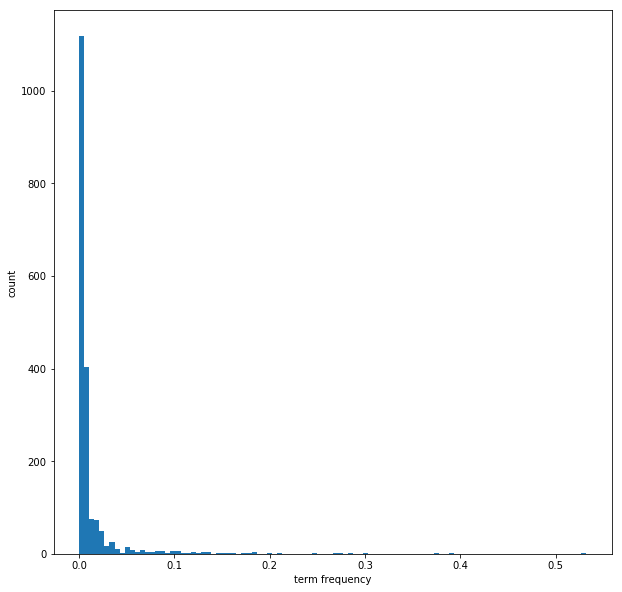

In [47]:
#plot distrib
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(df_word,bins=100)
ax.set_xlabel("term frequency")
ax.set_ylabel("count")
plt.show()

Nous avons une forme de distribution à queue lourde, regardons les termes en queue de distribution

In [48]:
for freq in np.arange(0.02,0.11,0.01):
    print("freq_min:{}...nb_term:{}".format(round(freq,2),len(np.where(df_word>freq)[0])))

freq_min:0.02...nb_term:208
freq_min:0.03...nb_term:143
freq_min:0.04...nb_term:116
freq_min:0.05...nb_term:96
freq_min:0.06...nb_term:82
freq_min:0.07...nb_term:70
freq_min:0.08...nb_term:63
freq_min:0.09...nb_term:50
freq_min:0.1...nb_term:41


Les éléments de la queue de distribution sont les éléments qui nous intéressent à qques stop words mal filtrés prêt. En effet pour chaque CV on prend la partie dédiée aux compétences plus une autre partie le découpage étant loin d'être parfait.

Les mots les plus fréquents seront donc à priori des mots décrivant les compétence, partie commune au corpus.

In [55]:
for idx in np.where(df_word>0.02)[0]:
    print(vocab_idf[idx])

microstrategy
professionnelles
flux
scala
pilotage
equipes
assistance
power
reseaux
logiciels
bureautique
olap
mysql
aide
vba
kanban
sgbd
controle
crm
management
consultant
oeuvre
essbase
techniques
fonctionnel
projets
langages
ouvrage
visual
processus
apprentissage
expertise
suivi
production
preparation
css3
intelligence
industrie
ibm
besoin
jquery
administration
finance
basic
scrum
conception
optimisation
progiciels
quality
salesforce
cadrage
decisionnels
uml
talend
financiere
fonctionnelles
shell
service
html5
decision
statistique
specifiques
hadoop
integration
bo
sectorielles
mining
validation
erp
ip
data
bw
analyse
projet
planification
excel
apache
cycle
tests
cognos
equipe
microsoft
statistiques
jee
systemes
ecole
j2ee
risques
software
script
access
specifications
alimentation
conduite
xp
informatiques
decisionnelle
strategie
audit
big
css
learning
report
restitution
ssis
design
qualite
recette
python
asp
spark
itil
reporting
analytics
maitrise
relationnelles
net
android
creation

Save vocabulary

In [56]:
vocab_204 = []
for idx in np.where(df_word>0.02)[0]:
    vocab_204.append(vocab_idf[idx])

In [60]:
thefile = open('vocabcv204.txt', 'w')
for item in vocab_204:
    thefile.write(item+',')

--------------